# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
headers = [th.text.strip() for th in rows[0].find_all('th')]
table_data = []


for row in rows[1:]:
    cols = row.find_all('td')  
    if cols:  
        table_data.append([col.text.strip() for col in cols])  


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print("Data Types Before Conversion:\n", df.dtypes)

Data Types Before Conversion:
 id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])  
df['sol'] = df['sol'].astype(int)  
df['ls'] = df['ls'].astype(int)  
df['month'] = df['month'].astype(int)  
df['min_temp'] = df['min_temp'].astype(float)  
df['pressure'] = df['pressure'].astype(float) 


In [11]:
# Confirm type changes were successful by examining data types again
print("\nData Types After Conversion:\n", df.dtypes)


Data Types After Conversion:
 id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months_mars = df['month'].unique
print(f"Number of months on Mars: {months_mars}")

Number of months on Mars: <bound method Series.unique of 0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int32>


In [13]:
# 2. How many sols (Martian days) worth of data are there?
sols = df['sol'].unique
print(f"Number of Sols : {sols}")

Number of Sols : <bound method Series.unique of 0         10
1         11
2         12
3         13
4         14
        ... 
1862    1973
1863    1974
1864    1975
1865    1976
1866    1977
Name: sol, Length: 1867, dtype: int32>


In [14]:
# 3. What is the average minimum temperature by month?
min_temp =df['min_temp'].unique
print(f"Minimum Temperature :{min_temp}")

Minimum Temperature :<bound method Series.unique of 0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64>


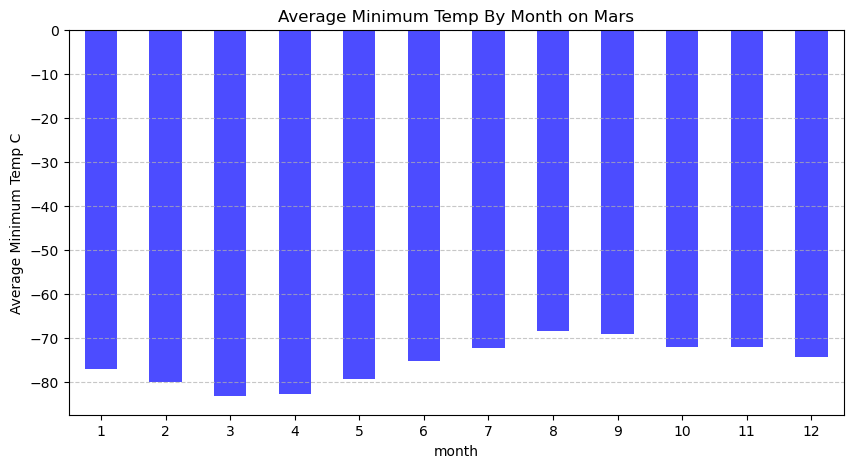

In [25]:
# Plot the average minimum temperature by month
average_temp =df.groupby("month")["min_temp"].mean()
plt.figure(figsize=(10,5))
average_temp.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("month")
plt.ylabel("Average Minimum Temp C")
plt.title("Average Minimum Temp By Month on Mars")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.show()

In [28]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = average_temp.idxmin()
hottest_month = average_temp.idxmax()
print(f"Coldest month: {coldest_month}")
print(f"Hottest month: {hottest_month}")

Coldest month: 3
Hottest month: 8


In [23]:
# 4. What is the average pressure by month?
pressure_month= df['pressure'].unique
print(f"Pressure : {min_temp}")

Pressure : <bound method Series.unique of 0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64>


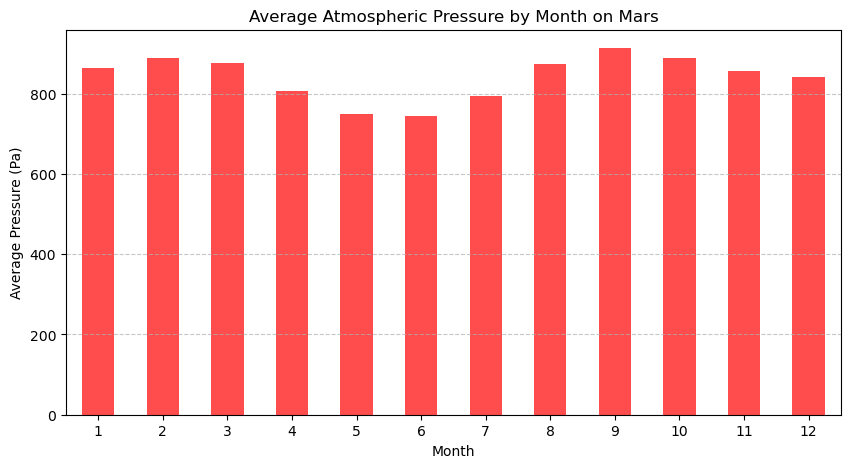

In [29]:
# Plot the average pressure by month
avg_pressure = df.groupby("month")["pressure"].mean()
plt.figure(figsize=(10,5))
avg_pressure.plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Atmospheric Pressure by Month on Mars")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [30]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
print(f"Lowest pressure month: {lowest_pressure_month}")
print(f"Highest pressure month: {highest_pressure_month}")


Lowest pressure month: 6
Highest pressure month: 9


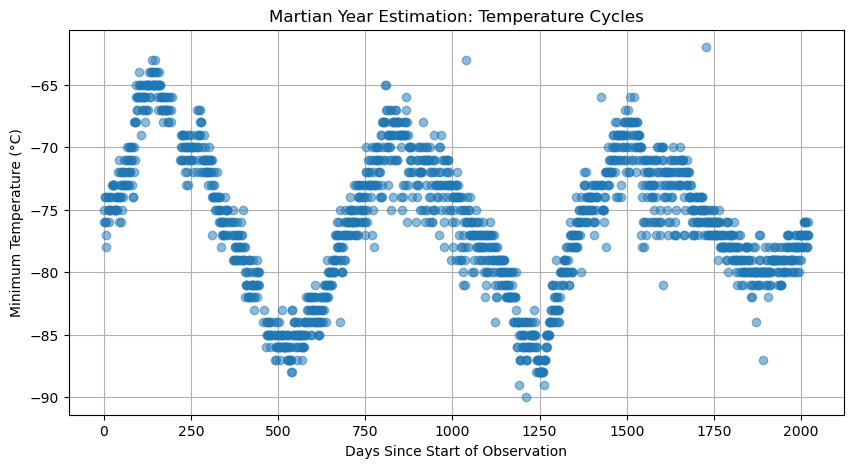

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])  
df = df.sort_values("terrestrial_date")
df["days_elapsed"] = (df["terrestrial_date"] - df["terrestrial_date"].min()).dt.days

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10,5))
plt.plot(df["days_elapsed"], df["min_temp"], alpha=0.5, marker="o", linestyle="None")
plt.xlabel("Days Since Start of Observation")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Martian Year Estimation: Temperature Cycles")
plt.grid()
plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

In [ ]:
# The minimum temperature of Mars has flucuated in a steady pattern over the last 2000 days. The minimum temparature starts around 65 C and goes down to about -90 C. 
# It looks like every 250-500 years the high/low temperature will peak and then it will start to fluctuate. 
# Around month 8/9 the minimum temperature starts to drop 


#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [ ]:
# The atmosphereic pressure of Mars is steadily around 800PA throughout all the months. 
# We can observe that the pressure does flucuate slightly, which we can determine is due to the fluctuating temperatures.
# There is lower pressure around month 6, and higher pressure around month 2 and 9.

#### Year Length

YOUR ANALYSIS HERE

In [ ]:
# We can observe from the graph that the year length of Mars is around 700 days. 
# Every 700 days Mars goes through its temperature cycle, indicating that this is the start of a new year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [32]:
# Write the data to a CSV
df.to_csv("mars_weather_data.csv", index=False)

In [22]:
browser.quit()